# Classification

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model

# Predict with the model
results = model("parrot.jpg")  # predict on an image


image 1/1 C:\Users\eleve\Documents\codex\backup\\DS\pytorch\notebook\ \YOLO\parrot.jpg: 448x640 4 birds, 1 kite, 43.2ms
Speed: 4.0ms preprocess, 43.2ms inference, 92.0ms postprocess per image at shape (1, 3, 448, 640)


# Instance Segmentation 


image 1/1 C:\Users\eleve\Documents\codex\backup\\DS\pytorch\notebook\ \YOLO\parrot.jpg: 448x640 5 birds, 1 kite, 24.0ms
Speed: 4.0ms preprocess, 24.0ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)


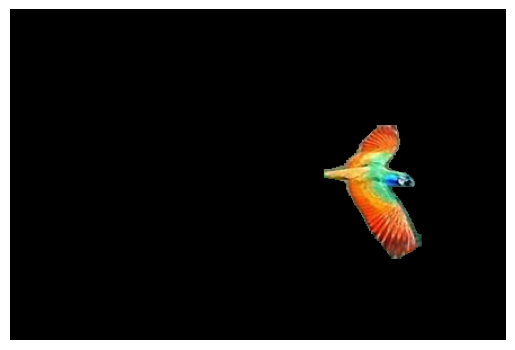

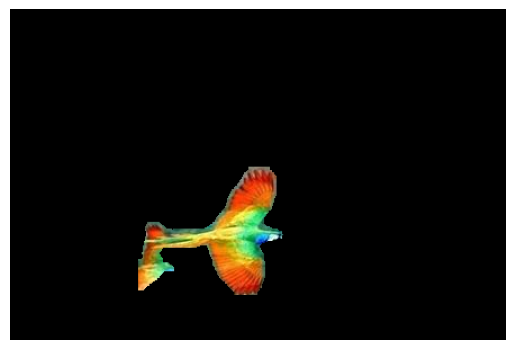

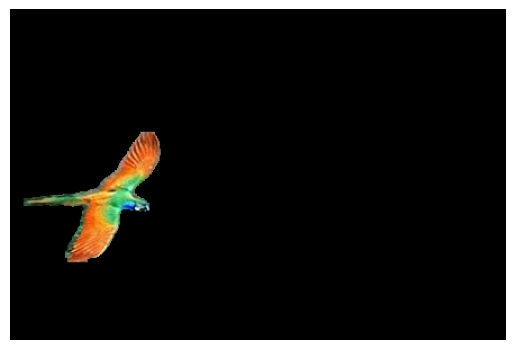

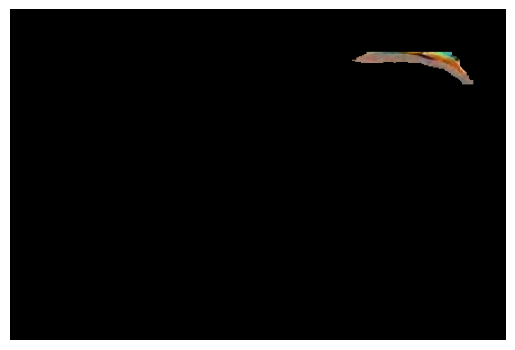

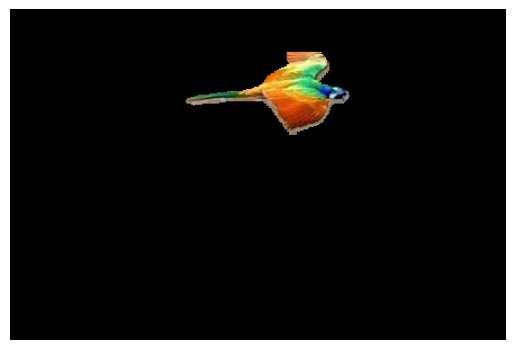

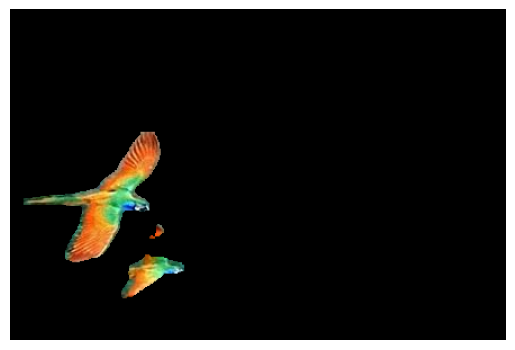

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model

# Predict with the model
results = model("parrot.jpg")  # predict on an image
 
if(results[0].masks is not None):

    for i in range(len(results[0].masks)):
            
        # Convert mask to single channel image
        mask_raw = results[0].masks[i].cpu().data.numpy().transpose(1, 2, 0)
        
        # Convert single channel grayscale to 3 channel image
        mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))
    
        # Get the size of the original image (height, width, channels)
        h2, w2, c2 = results[0].orig_img.shape
        
        # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
        mask = cv2.resize(mask_3channel, (w2, h2))
    
        # Convert BGR to HSV
        hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
    
        # Define range of brightness in HSV
        lower_black = np.array([0,0,0])
        upper_black = np.array([0,0,1])
    
        # Create a mask. Threshold the HSV image to get everything black
        mask = cv2.inRange(mask, lower_black, upper_black)
    
        # Invert the mask to get everything but black
        mask = cv2.bitwise_not(mask)
    
        # Apply the mask to the original image
        masked = cv2.bitwise_and(results[0].orig_img, results[0].orig_img, mask=mask)
    
        # Show the masked part of the image
        # cv2.imshow("mask", masked)
        plt.imshow(masked)
        plt.axis('off')
        plt.show()

# Commandline Interface

In [3]:
!yolo predict model=yolov8n.pt source=parrot.jpg

Ultralytics 8.3.20 馃殌 Python-3.12.3 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients

image 1/1 C:\Users\eleve\Documents\codex\backup\璇剧▼\DS\pytorch\notebook\绗�鍗佺珷 甯歌�佺綉缁滀唬鐮佺殑瑙ｈ�籠YOLO\parrot.jpg: 448x640 4 birds, 1 kite, 45.9ms
Speed: 4.0ms preprocess, 45.9ms inference, 110.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
馃挕 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
!yolo predict model=yolov8n-seg.pt source=parrot.jpg

Ultralytics 8.3.20 馃殌 Python-3.12.3 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients

image 1/1 C:\Users\eleve\Documents\codex\backup\璇剧▼\DS\pytorch\notebook\绗�鍗佺珷 甯歌�佺綉缁滀唬鐮佺殑瑙ｈ�籠YOLO\parrot.jpg: 448x640 5 birds, 1 kite, 45.3ms
Speed: 0.0ms preprocess, 45.3ms inference, 163.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict2
馃挕 Learn more at https://docs.ultralytics.com/modes/predict
